In [39]:
import numpy as np
import matplotlib.pyplot as plt

__Exercițiul 1.__ Sa se aproximeze a doua derivata a functiei (1) folosind metoda diferentelor finite. <br>
1. Să se reprezinte grafic derivata a doua exactă a funcției (1) și aproximarea numerică obținută. Numărul de puncte al discretizării intervalului, N, se va alege cel mai mic posibil astfel încât eroarea maximă de trunchiere să satisfacă relația $ \lVert e_{t} \rVert _{\infty} < 1e-5 $. <br>
2. Să se reprezinte într-o figură nouă eroarea de trunchiere. <br>
$$ f(x)=cos(-0.2x), \quad x \in  \left[-\frac{\pi}{2},\pi \right] \quad \quad \quad  (1)$$ <br>
Funcția _cosinus_ este o funcție pară și prin urmare a doua derivată este: <br> <br> 
$$ f''(x)=-0.04*cos(0.2x), \quad x \in  \left[-\frac{\pi}{2},\pi \right] \quad \quad \quad  (2)$$

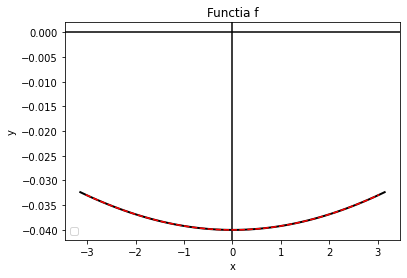

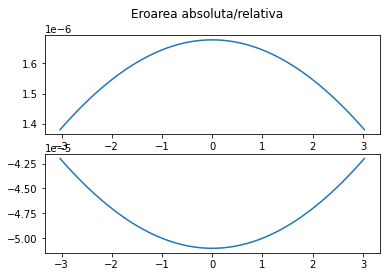

In [70]:
n = 57 # numarul de puncte ales pentru discretizarea intervalului [a,b]
# Domeniul functiei - intervalul [a,b]
left, right = -np.pi, np.pi
metoda_aproximare = 'progresiva' #'progresiva'/'regresiva'/'centrala'

def f(x):
    return np.cos(-0.2 * x)

def f_snd_derivate(x):
    return -0.04 * np.cos(0.2 * x)

# construim intervalul discreztizat [a,b]
x_grafic = np.linspace(left, right, n) # intervalul [a,b] contine n puncte echidistante
y_grafic = f(x_grafic)
h = x_grafic[1] - x_grafic[0]

# aproximam numeric cea de a doua derivata folosind metoda diferentelor finite centrale
f_snd_derivate_central = np.zeros(x_grafic.shape[0] - 2)
for i in range(1,n-1):
    f_snd_derivate_central[i-1] = (y_grafic[i+1] - 2 * y_grafic[i] + y_grafic[i-1]) / (h * h)

# reprezentare grafica    
plt.figure(0)
plt.title('Functia f')
plt.legend(['f(x)', 'x']) 
plt.axvline(0, c='black')
plt.axhline(0, c='black')
plt.xlabel('x') 
plt.ylabel('y') 
plt.plot(x_grafic, f_snd_derivate(x_grafic), c="black", linestyle="-", linewidth=2)

plt.plot(x_grafic[1:-1], f_snd_derivate_central, linestyle='--', color = 'red')
plt.show()

# Eroarea absoluta si eroarea relativa normalizata
abs_error = np.abs(f_snd_derivate_central - f_snd_derivate(x_grafic[1:-1]))
rel_error = abs_error / max(f_snd_derivate(x_grafic[1:-1]))

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Eroarea absoluta/relativa')
ax1.plot(x_grafic[1:-1], abs_error)
ax2.plot(x_grafic[1:-1], rel_error)
plt.show()

__Exercițiul 2.__ Aproximarea valorii unei integrale folosind metodele de cuadratură sumate.

In [79]:
from sys import exit

def f(x):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-1 * (x ** 2) / (2 * (sigma ** 2)))

a, b = -14, 14 # capetele intervalului
sigma = 1.4
N = 29
x_grafic = np.linspace(a,b,N)
y_grafic = f(x_grafic)

h = x_grafic[1] - x_grafic[0]

def metoda_dreptunghiului(f_x):
    return 2 * h * np.sum(f_x[::2])

def metoda_trapezului(f_x):
    return h / 2 * (f_x[0] + 2 * np.sum(f_x[1:-2]) + f_x[-1])

def metoda_Simpson(f_x):
    return h / 3 * (f_x[0] + 4 * np.sum(f_x[1:-1:2]) + 2 * np.sum(f_x[2:-1:2]) + f_x[-1])

def integrare(y_grafic, metoda):    
    if metoda == 'dreptunghi':
        I = metoda_dreptunghiului(y_grafic)
    elif metoda == 'trapez':
        I = metoda_trapezului(y_grafic)
    elif metoda == 'Simpson':
        I = metoda_Simpson(y_grafic)
    else:
        print('Metode valide: dreptunghi/trapez/Simpson')
        exit(1)

    return I

print('N =', N)
print('Aproximarea valorii integralei folosind metoda dreptunghiului: ', integrare(y_grafic, 'dreptunghi'))
print('Aproximarea valorii integralei folosind metoda trapezului: ', integrare(y_grafic, 'trapez'))
print('Aproximarea valorii integralei folosind metoda Simpson: ', integrare(y_grafic, 'Simpson'))

N = 29
Aproximarea valorii integralei folosind metoda dreptunghiului:  1.0001260206050164
Aproximarea valorii integralei folosind metoda trapezului:  1.0
Aproximarea valorii integralei folosind metoda Simpson:  0.9999579931316613
